In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("data_produksi.csv")


print("Data Produksi - 10 Baris Pertama:")
print(df.head(10))


print("\n Informasi Kolom dan Tipe Data:")
print(df.info())

print("\n Statistik Deskriptif:")
print(df.describe())


print("\n Cek Missing Value:")
print(df.isnull().sum())

le = LabelEncoder()
df['Jenis Produk'] = le.fit_transform(df['Jenis Produk'])

print("\n Jenis Produk Setelah Di-encode:")
print(df['Jenis Produk'].unique())



Data Produksi - 10 Baris Pertama:
   ID Jenis Produk  Permintaan  Stok Bahan  Mesin Aktif  Tenaga Kerja  \
0   1       Kulkas         202         428            1             5   
1   2       TV LED         535         747            3            13   
2   3    Microwave         960        1119            2            18   
3   4   Mesin Cuci         370        1446            4             9   
4   5   Mesin Cuci         206         205            4            17   
5   6           AC         171         667            2             9   
6   7       Kulkas         800         274            4             7   
7   8       Kulkas         120         203            5             9   
8   9      Setrika         714         845            5             7   
9  10       TV LED         221         317            5            13   

   Lama Produksi  
0             -2  
1             10  
2             35  
3             33  
4            -32  
5              2  
6             30  
7         

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


fitur = ['Jenis Produk', 'Permintaan', 'Stok Bahan', 'Mesin Aktif', 'Tenaga Kerja']
target = 'Lama Produksi'

X = df[fitur]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


print("\n Model telah dilatih menggunakan data training.")
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji  : {len(X_test)}")



 Model telah dilatih menggunakan data training.
Jumlah data latih: 960
Jumlah data uji  : 240


In [45]:
# Pisahkan fitur dan target
fitur = ['Jenis Produk', 'Permintaan', 'Stok Bahan', 'Mesin Aktif', 'Tenaga Kerja']
target = 'Lama Produksi'

X = df[fitur]
y = df[target]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data hasil split
print("Ukuran Data Training :", X_train.shape)
print("Ukuran Data Testing  :", X_test.shape)


Ukuran Data Training : (960, 5)
Ukuran Data Testing  : (240, 5)


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model dengan data training
model.fit(X_train, y_train)

# Konfirmasi bahwa model berhasil dilatih
print(" Model Random Forest berhasil dilatih.")


 Model Random Forest berhasil dilatih.


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Evaluasi performa model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n Evaluasi Model Random Forest:")
print(" R2 Score:", round(r2, 4))
print(" Mean Squared Error (MSE):", round(mse, 4))

# Menampilkan beberapa nilai prediksi vs aktual
hasil_df = pd.DataFrame({
    'Aktual': y_test.values[:10],
    'Prediksi': y_pred[:10]
})
print("\n Perbandingan Nilai Aktual dan Prediksi (10 Data Pertama):")
print(hasil_df)



 Evaluasi Model Random Forest:
 R2 Score: 0.8822
 Mean Squared Error (MSE): 33.1465

 Perbandingan Nilai Aktual dan Prediksi (10 Data Pertama):
   Aktual  Prediksi
0      29     30.50
1       3      9.16
2      21     26.64
3       7     11.73
4      66     60.95
5      30     32.93
6      25     26.30
7      33     25.84
8      13      8.17
9      11     11.60



 Feature Importance:
          Fitur  Importance
1    Permintaan    0.589222
2    Stok Bahan    0.229840
4  Tenaga Kerja    0.138881
3   Mesin Aktif    0.028824
0  Jenis Produk    0.013233


C:\Users\User\AppData\Local\Temp\ipykernel_8652\1093065147.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=feat_importance_df, palette='viridis')


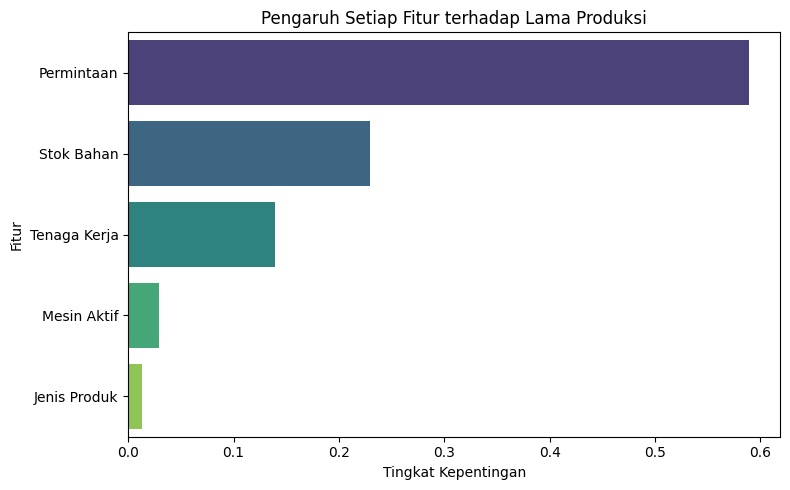

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil nama-nama fitur
feature_names = X.columns

# Ambil nilai pentingnya fitur dari model
importances = model.feature_importances_

# Buat DataFrame untuk visualisasi
feat_importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame
print("\n Feature Importance:")
print(feat_importance_df)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Fitur', data=feat_importance_df, palette='viridis')
plt.title("Pengaruh Setiap Fitur terhadap Lama Produksi")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


In [49]:
X = df[['Jenis Produk', 'Permintaan', 'Stok Bahan', 'Mesin Aktif', 'Tenaga Kerja']]
y = df['Lama Produksi']


In [50]:
from sklearn.preprocessing import LabelEncoder
X['Jenis Produk'] = LabelEncoder().fit_transform(X['Jenis Produk'])


C:\Users\User\AppData\Local\Temp\ipykernel_8652\4114185969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Jenis Produk'] = LabelEncoder().fit_transform(X['Jenis Produk'])


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 score: 0.8952909194508314


In [53]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8839937717004943
MSE: 32.635444120370366


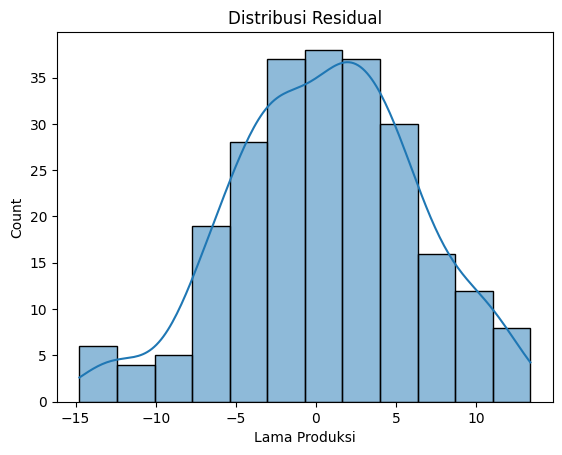

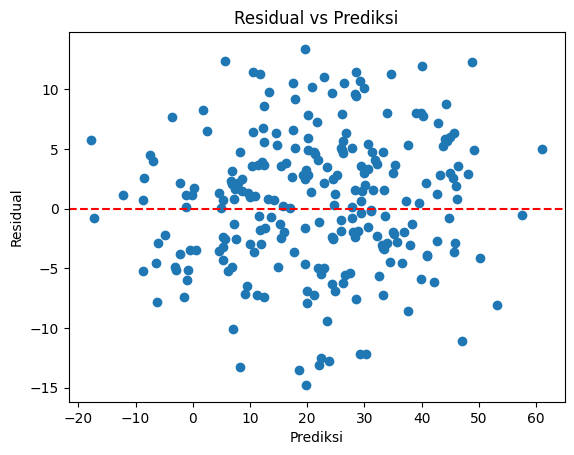

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Residual vs Prediksi')
plt.show()


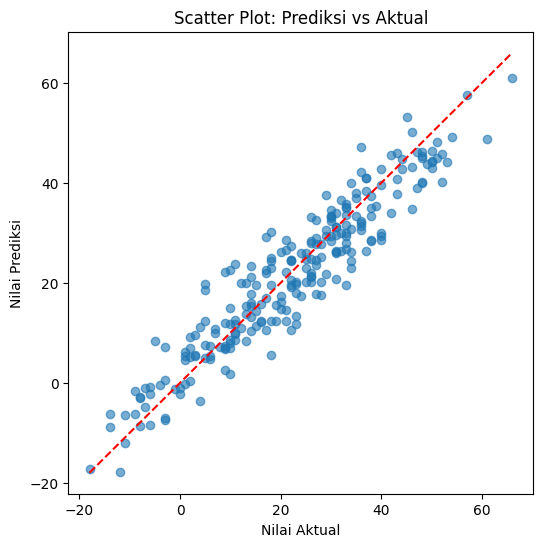

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Prediksi vs Aktual')
plt.show()


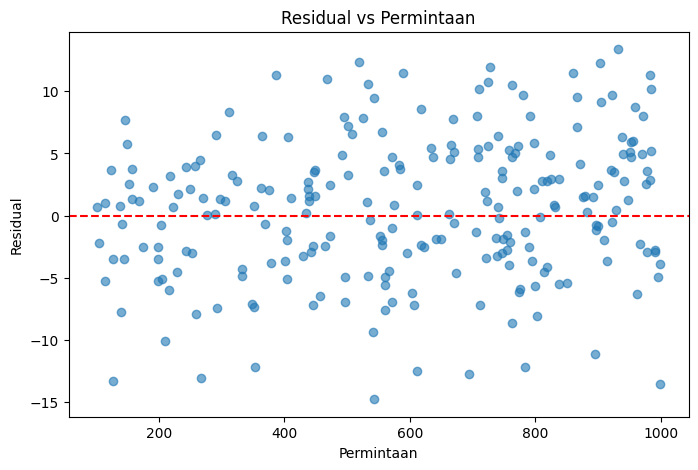

In [56]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(X_test['Permintaan'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Permintaan')
plt.ylabel('Residual')
plt.title('Residual vs Permintaan')
plt.show()

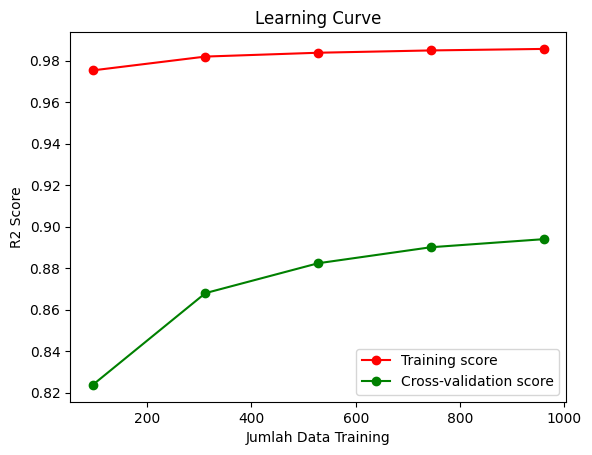

In [57]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Jumlah Data Training')
plt.ylabel('R2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

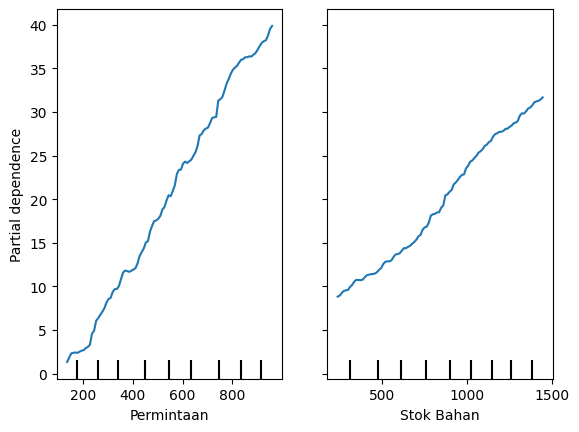

In [58]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = ['Permintaan', 'Stok Bahan']

PartialDependenceDisplay.from_estimator(best_model, X_train, features)
plt.show()


In [59]:
import sklearn
print(sklearn.__version__)

1.5.0


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# ... kode training sampai dapat best_model dan label encoder

# Simpan model
with open('model_rf_terbaik.pkl', 'wb') as f:
    pickle.dump(best_model, f)




NameError: name 'label_encoder' is not defined